### 4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.

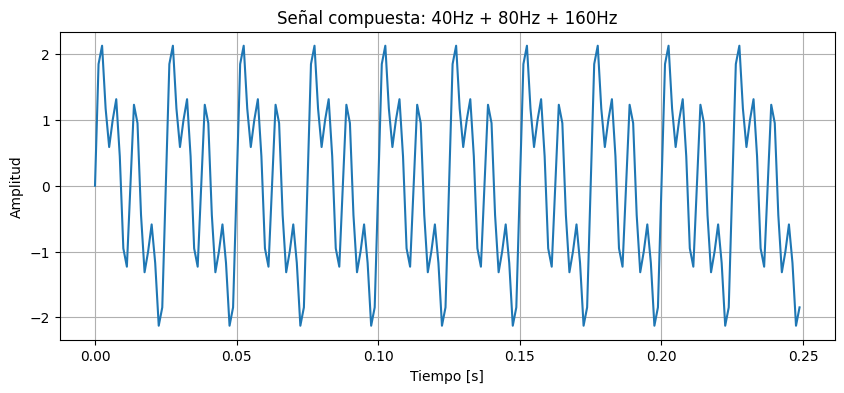

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
f1, f2, f3 = 40, 80, 160  # Frecuencias (Hz)
fs = 800                  # Frecuencia de muestreo (Hz)
T = 0.25                  # Duración (segundos)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Señal
signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# Graficar señal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Señal compuesta: 40Hz + 80Hz + 160Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

### 4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).

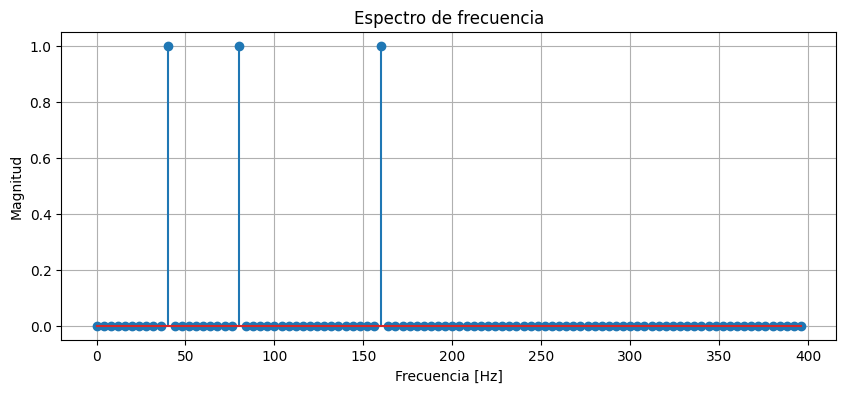

In [5]:
# FFT
N = len(signal)
freq = np.fft.fftfreq(N, d=1/fs)
spectrum = np.fft.fft(signal)

# Magnitud del espectro (solo parte positiva)
half_N = N // 2
plt.figure(figsize=(10, 4))
plt.stem(freq[:half_N], np.abs(spectrum[:half_N]) / half_N)
plt.title("Espectro de frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

### 4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

La funcion *np.fft.ifft(spectrum)* calcula la Transformada Inversa de Fourier de una señal compleja, convirtiéndola del dominio de la frecuencia al dominio del tiempo.

La entrada es un array complejo que representa el espectro de frecuencias (spectrum) y la salida es una señal compleja (aunque normalmente se toma solo la parte real si se trabaja con señales reales).

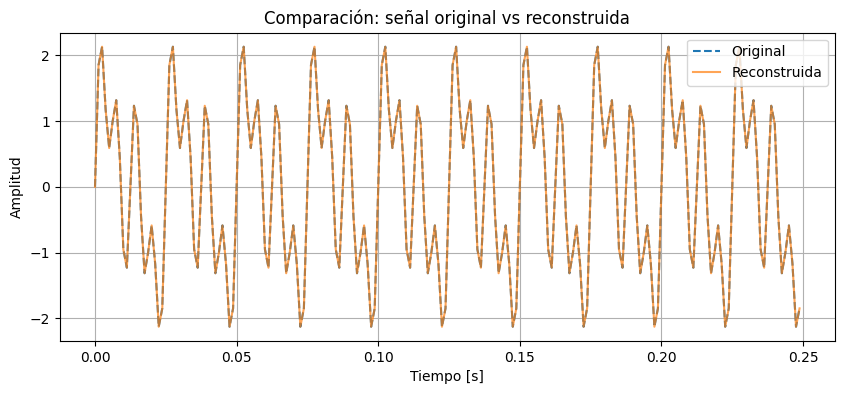

In [6]:
# Transformada inversa
reconstructed_signal = np.fft.ifft(spectrum)

# Verificación (superposición)
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original', linestyle='--')
plt.plot(t, reconstructed_signal.real, label='Reconstruida', alpha=0.7)
plt.title("Comparación: señal original vs reconstruida")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

### 4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?
F1 = np.fft.fft(x);

F2 = np.zeros((len(F1)));

F2[9:13] = F1[9:13];

xr = np.fft.ifft(F2);

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(t, np.real(xr))

ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');

plt.show()

### Extraiga de manera similar cada una de las componentes de la señal.

Las líneas de código sí representan un filtro en el dominio de la frecuencia. Primero, se realiza la transformada rápida de Fourier (np.fft.fft(x)) para obtener el contenido espectral de la señal. Luego, se crea un nuevo espectro (F2) en el que se conservan únicamente ciertas componentes de frecuencia (índices 9 al 12) y se eliminan las demás al asignarles un valor de cero. Finalmente, al aplicar la transformada inversa (np.fft.ifft(F2)), se obtiene una versión de la señal que contiene solo el rango de frecuencias seleccionado. Este procedimiento corresponde a un filtrado pasabanda, ya que permite el paso de un grupo estrecho de frecuencias y rechaza el resto, modificando así el contenido espectral de la señal original.

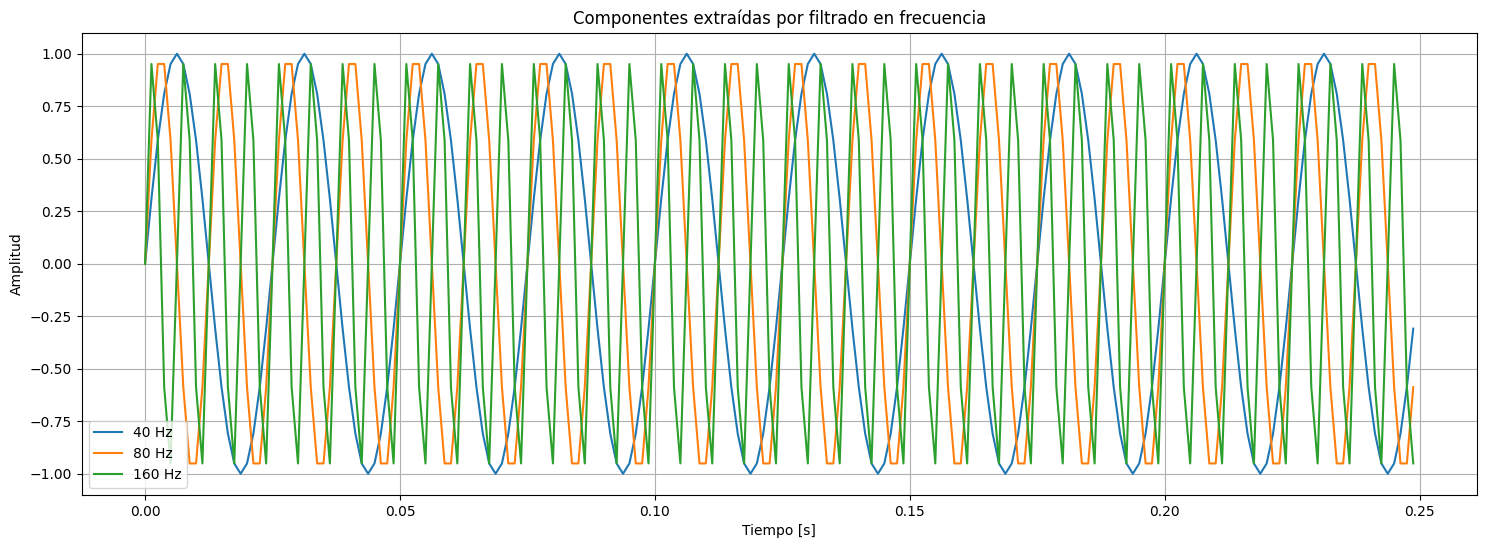

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Señal original
fs = 800
T = 0.25
t = np.linspace(0, T, int(fs*T), endpoint=False)
x = np.sin(2*np.pi*40*t) + np.sin(2*np.pi*80*t) + np.sin(2*np.pi*160*t)

# FFT
F = np.fft.fft(x)
N = len(F)

# Función para extraer un rango de frecuencias
def extraer_componente(F, idx_ini, idx_fin):
    F_comp = np.zeros_like(F)
    F_comp[idx_ini:idx_fin] = F[idx_ini:idx_fin]
    # Simétrico para frecuencia negativa
    F_comp[-idx_fin:-idx_ini] = F[-idx_fin:-idx_ini]
    return np.fft.ifft(F_comp).real

# Extraer componentes (los índices se estiman según resolución)
f_res = fs / N  # Resolución en frecuencia

# Aproximación de los índices para 40, 80 y 160 Hz
idx_40 = int(40 / f_res)
idx_80 = int(80 / f_res)
idx_160 = int(160 / f_res)

# Extraer cada componente
x_40 = extraer_componente(F, idx_40-2, idx_40+3)
x_80 = extraer_componente(F, idx_80-2, idx_80+3)
x_160 = extraer_componente(F, idx_160-2, idx_160+3)

# Graficar
plt.figure(figsize=(18, 6))
plt.plot(t, x_40, label='40 Hz')
plt.plot(t, x_80, label='80 Hz')
plt.plot(t, x_160, label='160 Hz')
plt.title("Componentes extraídas por filtrado en frecuencia")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

### 4.5. El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

C:\Users\ctama\AppData\Local\Temp\ipykernel_74180\444980875.py:14: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  window = hann(nperseg)


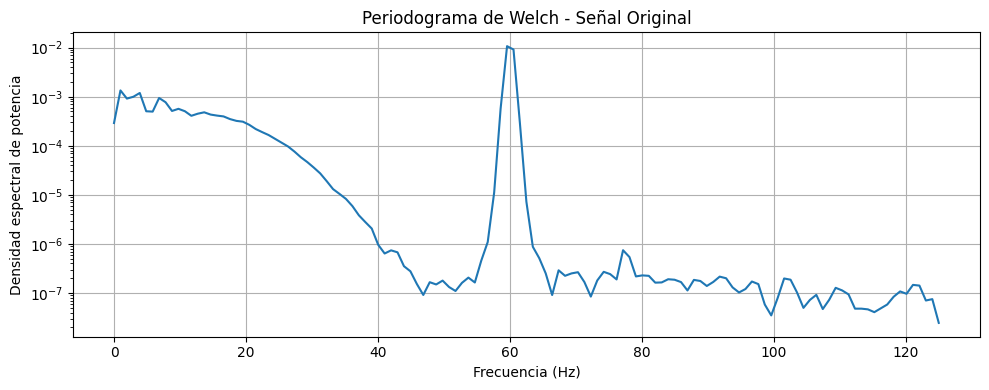

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hann, butter, filtfilt

# Cargar señal
data = sio.loadmat('senecg.mat')
ecg = data['ECG'].flatten()

# Parámetros
fs = 250  # Hz
nperseg = 256
noverlap = 128
window = hann(nperseg)
N = len(ecg)
t = np.arange(N) / fs

# Periodograma de Welch (señal original)
f, Pxx = welch(ecg, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx)
plt.title('Periodograma de Welch - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Transformada rápida de Fourier
F1 = np.fft.fft(ecg)

# Crear vector de frecuencias asociadas a los índices
freqs = np.fft.fftfreq(N, d=1/fs)

### ¿Es necesario eliminar ruido?

Si hay que eliminar ruido. debido que en el periodograma se observa un pico muy agudo alrededor de los 60 Hz, lo cual es característico del ruido por interferencia de la red eléctrica. Este componente no es fisiológico, así que debe ser eliminado.

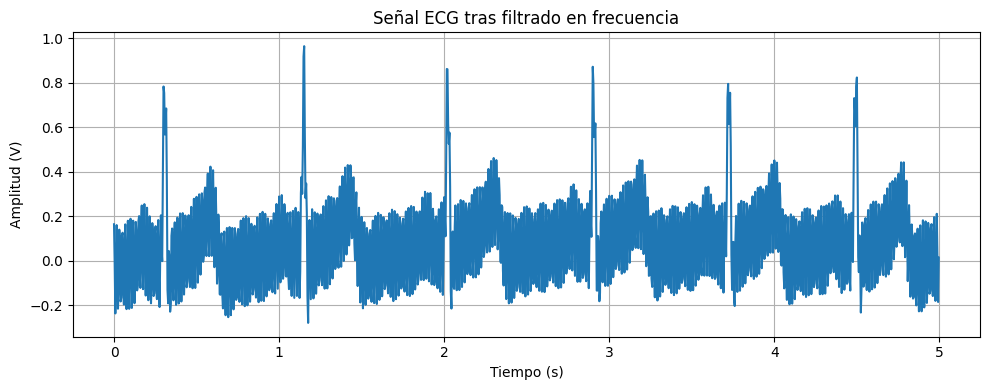

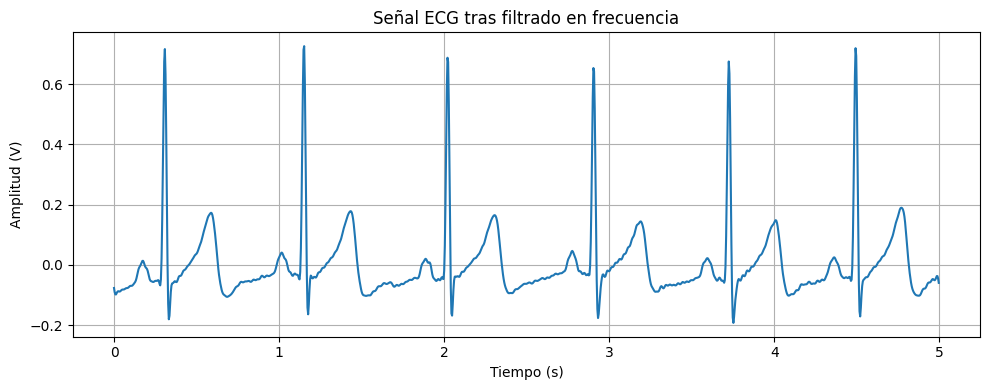

In [ ]:
# Señal antes del filtrado
plt.figure(figsize=(10, 4))
plt.plot(t, ecg, label='Señal filtrada (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Señal ECG tras filtrado en frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

# Transformada rápida de Fourier
F1 = np.fft.fft(ecg)

# Crear vector de frecuencias asociadas a los índices
freqs = np.fft.fftfreq(N, d=1/fs)

# Filtrado: mantener solo las frecuencias fisiológicas (0.5–40 Hz aprox.)
F2 = np.zeros_like(F1, dtype=complex)
mask = (np.abs(freqs) > 0.5) & (np.abs(freqs) < 40)  # mantener solo estas
F2[mask] = F1[mask]

# Transformada inversa
xr = np.fft.ifft(F2)

# Señal filtrada en el dominio temporal
plt.figure(figsize=(10, 4))
plt.plot(t, np.real(xr), label='Señal filtrada (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Señal ECG tras filtrado en frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

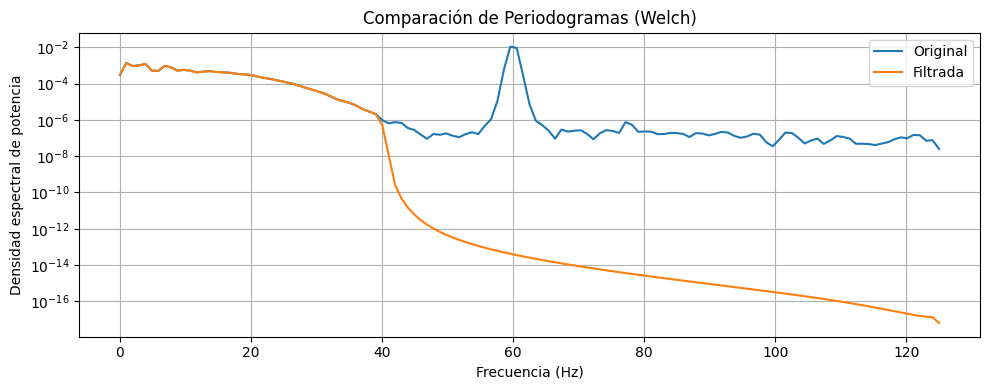

In [ ]:
# Original
f, Pxx = welch(ecg, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
# Filtrada
f_filt, Pxx_filt = welch(np.real(xr), fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Graficar ambos
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx, label='Original')
plt.semilogy(f_filt, Pxx_filt, label='Filtrada')
plt.title('Comparación de Periodogramas (Welch)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analisis

Se realizó un análisis espectral de la señal de ECG utilizando el método de Welch, con una ventana de Hanning de 256 muestras y un solapamiento del 50 %, con el fin de obtener una estimación suave y confiable del contenido en frecuencia. En el espectro original se observa un pico claramente definido alrededor de los 60 Hz, el cual corresponde a interferencia de la red eléctrica, un tipo de ruido común en señales biomédicas. Dado que dicha componente no es fisiológica y puede interferir con el análisis clínico de la señal, se procedió a eliminarla aplicando un filtrado en el dominio de la frecuencia. Para ello, se utilizó la transformada rápida de Fourier (FFT), se conservaron únicamente los coeficientes correspondientes al rango de interés (de 0.5 a 40 Hz), y se aplicó la transformada inversa para obtener la señal filtrada. La comparación de los periodogramas antes y después del filtrado confirma la eliminación efectiva del ruido, evidenciada por la desaparición del pico en 60 Hz y la reducción de componentes en frecuencias superiores a 40 Hz, manteniendo intacto el contenido fisiológico esencial de la señal.

### 4.6	Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%)

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.io import loadmat
import random

In [ ]:
# Rutas a archivos 
ruta_control = "./control/*.mat"
ruta_parkinson = "./parkinson/*.mat"


In [ ]:
# Obtener archivos
archivos_control = glob.glob(ruta_control)
archivos_parkinson = glob.glob(ruta_parkinson)

print(f"Archivos en control: {len(archivos_control)}")
print(f"Archivos en parkinson: {len(archivos_parkinson)}")

Archivos en control: 36
Archivos en parkinson: 23


In [ ]:
# Verificar existencia
if len(archivos_control) == 0 or len(archivos_parkinson) == 0:
    raise FileNotFoundError("No se encontraron archivos .mat en alguna de las carpetas.")


In [ ]:
# Selección aleatoria
archivo_control = random.choice(archivos_control)
archivo_parkinson = random.choice(archivos_parkinson)

In [ ]:
# Función para extraer una señal del archivo 
def cargar_senal_mat(ruta, canal=0, segmento=0):
    mat = loadmat(ruta)
    data = mat['data']  # forma: (8, 2000, 180)
    señal = data[canal, :, segmento]  # 1D: 2000 muestras
    return señal

In [ ]:
# Cargar señales
senal_control = cargar_senal_mat(archivo_control)
senal_parkinson = cargar_senal_mat(archivo_parkinson)

In [ ]:
# Parámetros
fs = 250

In [ ]:
# Welch con ajuste 
def aplicar_welch(senal, fs, etiqueta):
    largo = len(senal)
    nperseg = min(512, largo)
    noverlap = nperseg // 2
    print(f"{etiqueta} → largo={largo}, nperseg={nperseg}, noverlap={noverlap}")
    f, Pxx = welch(senal, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap)
    return f, Pxx

In [ ]:
# Aplicar Welch
f_ctrl, Pxx_ctrl = aplicar_welch(senal_control, fs, "Control")
f_park, Pxx_park = aplicar_welch(senal_parkinson, fs, "Parkinson")

Control → largo=2000, nperseg=512, noverlap=256
Parkinson → largo=2000, nperseg=512, noverlap=256


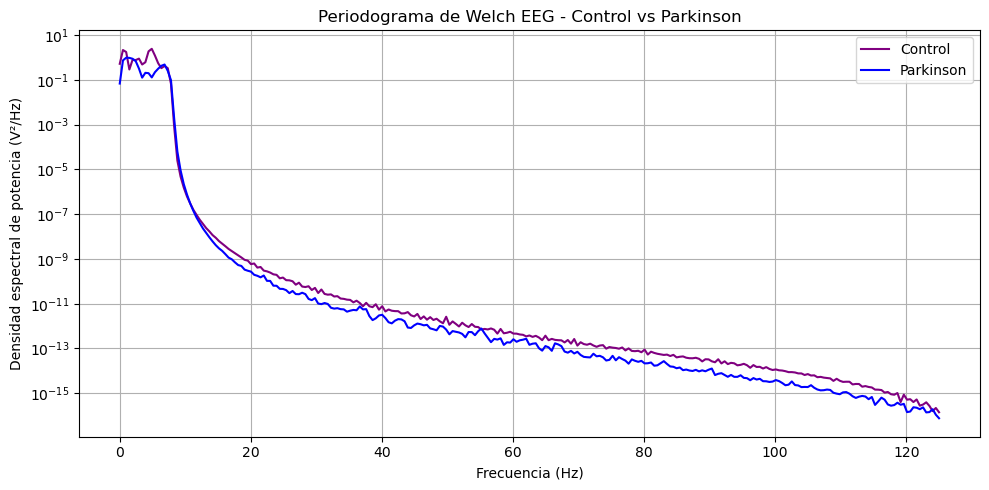

In [ ]:
# Graficar
plt.figure(figsize=(10, 5))
plt.semilogy(f_ctrl, Pxx_ctrl, label='Control', color='purple')
plt.semilogy(f_park, Pxx_park, label='Parkinson', color='blue')
plt.title('Periodograma de Welch EEG - Control vs Parkinson')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V²/Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Justificación del Tamaño de Segmento (512 muestras)

El tamaño del segmento, fijado en 512 muestras, es un parámetro crítico que afecta la resolución de frecuencia y la varianza de la estimación. Un segmento más largo proporciona una mayor resolución de frecuencia, permitiendo distinguir bandas de frecuencia más cercanas. Sin embargo, segmentos excesivamente largos pueden violar la suposición de estacionariedad local de la señal dentro del segmento, especialmente en el EEG que es inherentemente no estacionario [1]. Por otro lado, segmentos muy cortos resultan en una menor resolución de frecuencia y una mayor varianza. La elección de 512 muestras (o un valor similar como 1-2 segundos de datos, dependiendo de la frecuencia de muestreo) es un compromiso comúnmente aceptado en el análisis de EEG, buscando un balance entre estas dos propiedades [2]. Para una frecuencia de muestreo típica de 256 Hz, 512 muestras corresponden a 2 segundos de datos, lo que es un tiempo suficiente para capturar las oscilaciones lentas y rápidas sin asumir estacionariedad a largo plazo.



Justificación del Solapamiento (50%)


Se utilizó un solapamiento del 50% entre los segmentos. El solapamiento es fundamental para reducir la varianza de la estimación de la DSP. Al superponer los segmentos, se aumenta el número efectivo de promedios realizados, lo que mejora la suavidad y la fiabilidad del periodograma resultante [2]. Un solapamiento del 50% es ampliamente recomendado y utilizado porque maximiza el número de promedios sin introducir una correlación excesiva entre los segmentos adyacentes, lo que podría sesgar la estimación [2], [3]. Un solapamiento menor podría llevar a una estimación más ruidosa, mientras que uno mucho mayor (ej., 90%) podría no proporcionar beneficios significativos adicionales en la reducción de varianza debido a la alta redundancia entre segmentos [4].

Conclusiones

Se observaron diferencias notables en la distribución espectral entre los sujetos del grupo control y los pacientes con Parkinson. El grupo control mostró mayor actividad en la banda alfa (8–13 Hz), mientras que el grupo Parkinson presentó mayor potencia en bandas lentas, como delta (0.5–4 Hz) y theta (4–8 Hz), lo que es consistente con la literatura clínica y neurofisiológica.

El aumento de potencia en bandas bajas en pacientes con Parkinson sugiere una ralentización general del EEG, fenómeno comúnmente asociado al deterioro de la actividad cortical y funciones cognitivas afectadas por la enfermedad.


El uso del periodograma de Welch con ventana Hanning, 512 muestras y 50% de solapamiento demostró ser una herramienta robusta para revelar diferencias en la densidad espectral de potencia entre poblaciones neurológicas distintas, incluso con análisis sobre un solo canal y segmento.


Referencías:
[1] F. J. Harris, "On the use of windows for harmonic analysis with the Discrete Fourier Transform," Proc. IEEE, vol. 66, no. 1, pp. 51-83, Jan. 1978.
[2] A. Meziani, K. Djouani, T. Medkou y A. Chibani. “Extracción de características basada en un periodograma de cuantiles Lasso para imágenes motoras basadas en EEG”. [En línea]. Disponible: https://www-sciencedirect-com.udea.lookproxy.com/science/article/pii/S0165027019302912
[3] A. Delorme y S. Makeig, "EEGLAB: una herramienta de código abierto para el análisis de la dinámica del EEG de un solo ensayo, incluyendo el análisis de componentes independientes", J. Neurosci. Methods , vol. 134, n.º 1, págs. 9-21, marzo.2004.
[4] JG Proakis y DG Manolakis, Procesamiento de señales digitales: principios, algoritmos y aplicaciones . Upper Saddle River, NJ, EE. UU.: PearsonPrentice Hall, 2007.

